### <i> Machine Learning-Driven Analysis of Low-Carbon Technology Trade and Its Economic Impact in the USA 25207 </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/pinuto/imf-global-low-carbon-tech-trade-and-impact </i>
### <i> Import Library Files </i>

In [2]:
!pip install folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from scipy.stats import zscore
import folium
from folium.plugins import HeatMap
import plotly.express as px
import squarify
import warnings
warnings.filterwarnings('ignore')


### <i> Load The Dataset </i>

In [4]:
df = pd.read_csv("Trade_in_Low_Carbon_Technology_Products.csv")
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,F2023
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Comparative advantage in low carbon technology...,Index,Department of Economic and Social Affairs/Unit...,ECBTLA,Trade in Low Carbon Technology Products; Compa...,"Environment, Climate Change, Mitigation, Trade...",...,NaN,NaN,NaN,8.920699e-05,8.182348e-05,5.877251e-04,NaN,NaN,NaN,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,Exports of low carbon technology products,US Dollars,Department of Economic and Social Affairs/Unit...,ECBTLX,Trade in Low Carbon Technology Products; Exports,"Environment, Climate Change, Mitigation, Trade...",...,NaN,NaN,NaN,3.401980e+03,3.217850e+03,2.408955e+04,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,Exports of low carbon technology products as p...,Percent,Department of Economic and Social Affairs/Unit...,ECBTLX,Trade in Low Carbon Technology Products; Exports,"Environment, Climate Change, Mitigation, Trade...",...,NaN,NaN,NaN,1.801617e-05,1.754935e-05,1.276217e-04,NaN,NaN,NaN,NaN
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,Exports of low carbon technology products as s...,Percent,Department of Economic and Social Affairs/Unit...,ECBTLX,Trade in Low Carbon Technology Products; Exports,"Environment, Climate Change, Mitigation, Trade...",...,NaN,NaN,NaN,4.077410e-04,3.676782e-04,2.788680e-03,NaN,NaN,NaN,NaN
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,Imports of low carbon technology products,US Dollars,Department of Economic and Social Affairs/Unit...,ECBTLM,Trade in Low Carbon Technology Products; Imports,"Environment, Climate Change, Mitigation, Trade...",...,NaN,8.503327e+06,6.561112e+06,1.611734e+07,1.912370e+07,1.054682e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2145,Zimbabwe,ZW,ZWE,Imports of low carbon technology products as s...,Percent,Department of Economic and Social Affairs/Unit...,ECBTLM,Trade in Low Carbon Technology Products; Imports,"Environment, Climate Change, Mitigation, Trade...",...,2.545643e+00,3.175835e+00,3.689556e+00,3.396853e+00,3.572504e+00,4.526781e+00,5.830961e+00,5.305372e+00,5.575392e+00,4.930165e+00
2139,2146,Zimbabwe,ZW,ZWE,Total trade in low carbon technology products,US Dollars,Department of Economic and Social Affairs/Unit...,ECBTL,Trade in Low Carbon Technology Products,"Environment, Climate Change, Mitigation, Trade...",...,1.231118e+08,1.400469e+08,1.436859e+08,1.403382e+08,1.582177e+08,1.808416e+08,2.519870e+08,3.193733e+08,3.713313e+08,3.666519e+08
2140,2147,Zimbabwe,ZW,ZWE,Total trade in low carbon technology products ...,Percent,Department of Economic and Social Affairs/Unit...,ECBTL,Trade in Low Carbon Technology Products,"Environment, Climate Change, Mitigation, Trade...",...,6.313605e-01,7.013101e-01,6.990162e-01,6.365724e-01,4.268619e-01,6.946711e-01,9.375067e-01,8.867523e-01,1.186714e+00,1.138104e+00
2141,2148,Zimbabwe,ZW,ZWE,Trade balance in low carbon technology products,US Dollars,Department of Economic and Social Affairs/Unit...,ECBTLB,Trade in Low Carbon Technology Products; Trade...,"Environment, Climate Change, Mitigation, Trade...",...,-1.101298e+08,-1.294617e+08,-1.354482e+08,-1.287631e+08,-1.470443e+08,-1.395372e+08,-2.399166e+08,-3.025721e+08,-3.534533e+08,-3.488867e+08


### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             2143 non-null   int64  
 1   Country              2143 non-null   object 
 2   ISO2                 2110 non-null   object 
 3   ISO3                 2121 non-null   object 
 4   Indicator            2143 non-null   object 
 5   Unit                 2143 non-null   object 
 6   Source               2143 non-null   object 
 7   CTS_Code             2143 non-null   object 
 8   CTS_Name             2143 non-null   object 
 9   CTS_Full_Descriptor  2143 non-null   object 
 10  Trade_Flow           2143 non-null   object 
 11  Scale                2143 non-null   object 
 12  F1994                720 non-null    float64
 13  F1995                830 non-null    float64
 14  F1996                908 non-null    float64
 15  F1997                948 non-null    f

In [7]:
df.describe()

,ObjectId,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,F2023
count,2143.000000,7.200000e+02,8.300000e+02,9.080000e+02,9.480000e+02,1.371000e+03,1.464000e+03,1.661000e+03,1.677000e+03,1.697000e+03,...,1.799000e+03,1.837000e+03,1.859000e+03,1.889000e+03,1.851000e+03,1.801000e+03,1.766000e+03,1.785000e+03,1.608000e+03,1.311000e+03
mean,1072.543164,1.385211e+09,1.531140e+09,1.524991e+09,1.541488e+09,1.096274e+09,1.093049e+09,1.126585e+09,1.086062e+09,1.098939e+09,...,3.356820e+09,3.092795e+09,2.995846e+09,3.395319e+09,3.727296e+09,3.939807e+09,4.114679e+09,5.072811e+09,5.381876e+09,6.818272e+09
std,619.632756,1.167803e+10,1.380172e+10,1.447518e+10,1.510600e+10,1.287937e+10,1.326430e+10,1.461149e+10,1.415464e+10,1.436792e+10,...,4.441164e+10,4.157889e+10,4.072997e+10,4.620266e+10,5.003091e+10,5.228895e+10,5.404705e+10,6.709591e+10,6.748553e+10,7.730976e+10
min,1.000000,-7.093866e+09,-7.571388e+09,-8.445937e+09,-6.727012e+09,-6.543204e+09,-7.157958e+09,-9.108712e+09,-9.603665e+09,-1.529988e+10,...,-1.252699e+10,-8.541290e+09,-1.903120e+10,-2.275297e+10,-2.393490e+10,-2.848850e+10,-3.671848e+10,-5.453843e+10,-5.807098e+10,-7.768551e+10
25%,536.500000,3.382062e-02,4.245792e-02,3.517786e-02,2.405548e-02,1.128266e-01,1.197011e-01,8.414909e-02,8.468798e-02,9.112847e-02,...,1.333159e-01,1.139002e-01,1.171409e-01,1.119763e-01,1.039563e-01,1.171031e-01,1.099328e-01,1.089515e-01,1.205383e-01,1.867605e-01
50%,1072.000000,1.091291e+00,1.084656e+00,1.073496e+00,1.078962e+00,1.204817e+00,1.216314e+00,1.095845e+00,1.094204e+00,1.052610e+00,...,1.386174e+00,1.364656e+00,1.346353e+00,1.373811e+00,1.495282e+00,1.516533e+00,1.576907e+00,1.587689e+00,1.645961e+00,2.032883e+00
75%,1607.500000,5.075036e+07,4.535950e+07,4.330073e+07,3.812333e+07,6.227328e+06,3.861569e+06,2.095964e+06,2.075434e+06,2.308665e+06,...,1.151922e+07,1.182573e+07,9.104005e+06,8.288747e+06,9.229277e+06,1.433221e+07,1.120859e+07,1.331167e+07,1.934837e+07,3.198203e+07
max,2149.000000,2.475576e+11,3.145654e+11,3.457233e+11,3.684303e+11,3.781359e+11,4.019057e+11,4.702356e+11,4.586145e+11,4.691799e+11,...,1.491602e+12,1.410025e+12,1.392348e+12,1.592939e+12,1.707037e+12,1.759585e+12,1.799683e+12,2.244642e+12,2.144684e+12,2.209894e+12


In [8]:
# Convert year columns to numeric
year_cols = [col for col in df.columns if col.startswith("F")]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Fill missing values (Example: Forward Fill)
df[year_cols] = df[year_cols].fillna(method='ffill', axis=1)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Missing Values:
ISO2       33
ISO3       22
F1994    1423
F1995    1313
F1996    1235
F1997    1195
F1998     772
F1999     679
F2000     482
F2001     466
F2002     446
F2003     393
F2004     403
F2005     408
F2006     373
F2007     349
F2008     364
F2009     362
F2010     334
F2011     340
F2012     332
F2013     330
F2014     344
F2015     306
F2016     284
F2017     254
F2018     292
F2019     342
F2020     377
F2021     358
F2022     535
F2023     832
dtype: int64

Summary Statistics:
          ObjectId         F1994         F1995         F1996         F1997  \
count  2143.000000  7.200000e+02  8.640000e+02  9.990000e+02  1.080000e+03   
mean   1072.543164  1.385211e+09  1.471196e+09  1.386824e+09  1.363669e+09   
std     619.632756  1.167803e+10  1.353036e+10  1.380638e+10  1.416084e+10   
min       1.000000 -7.093866e+09 -7.571388e+09 -8.445937e+09 -6.727012e+09   
25%     536.500000  3.382062e-02  4.061500e-02  3.023576e-02  1.790542e-02   
50%    1072.000000  1.091291e+00 

### <i> Data Visulization And Analysis </i>

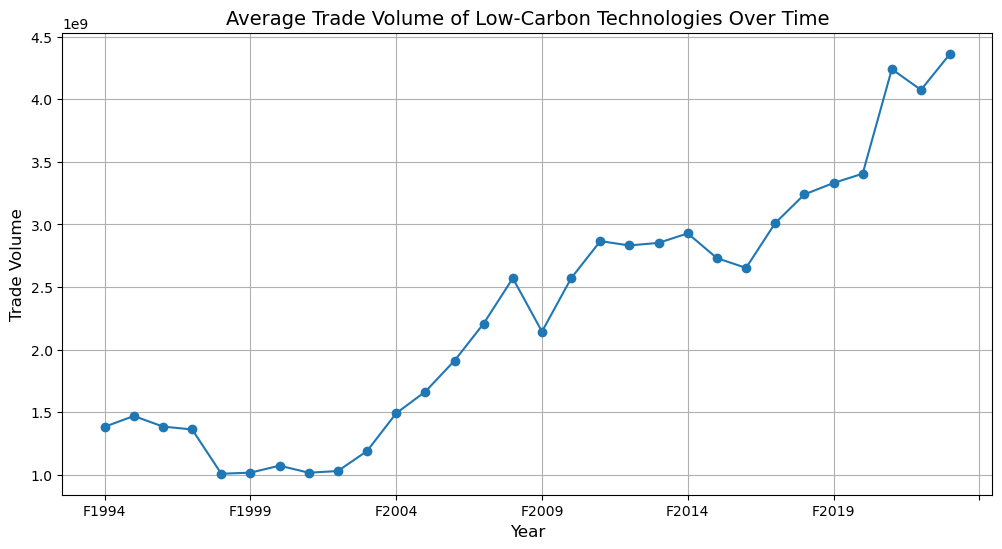

In [10]:
### Data Visualization ###

# 1. Trade Trend Over the Years
plt.figure(figsize=(12, 6))
df[year_cols].mean().plot(marker='o', linestyle='-')
plt.title("Average Trade Volume of Low-Carbon Technologies Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Trade Volume", fontsize=12)
plt.grid(True)
plt.show()

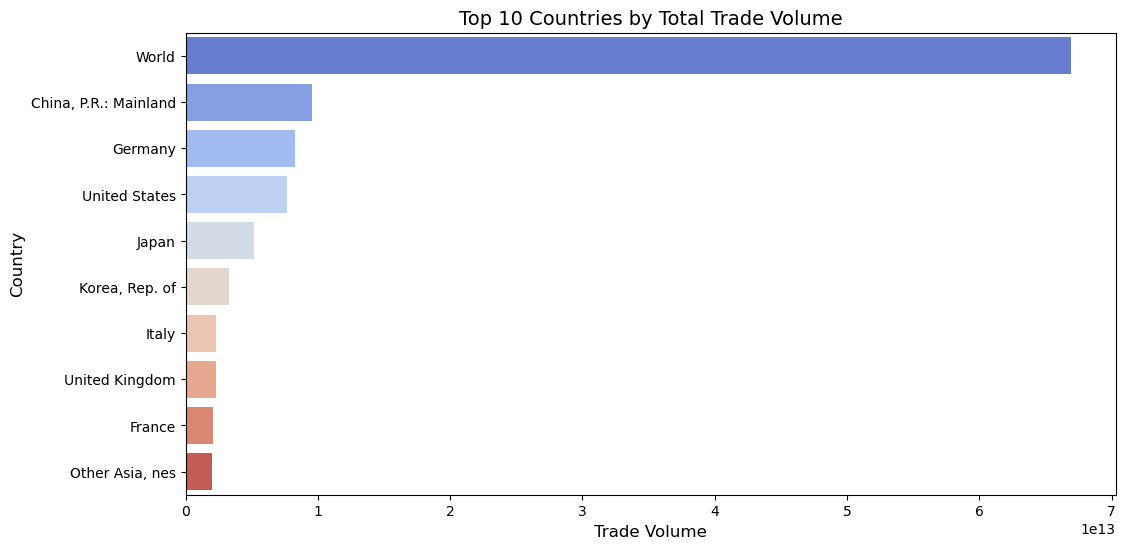

In [11]:
# 2. Top 10 Countries by Total Trade Volume
df['Total_Trade'] = df[year_cols].sum(axis=1)
top_countries = df.groupby('Country')['Total_Trade'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Total Trade Volume", fontsize=14)
plt.xlabel("Trade Volume", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

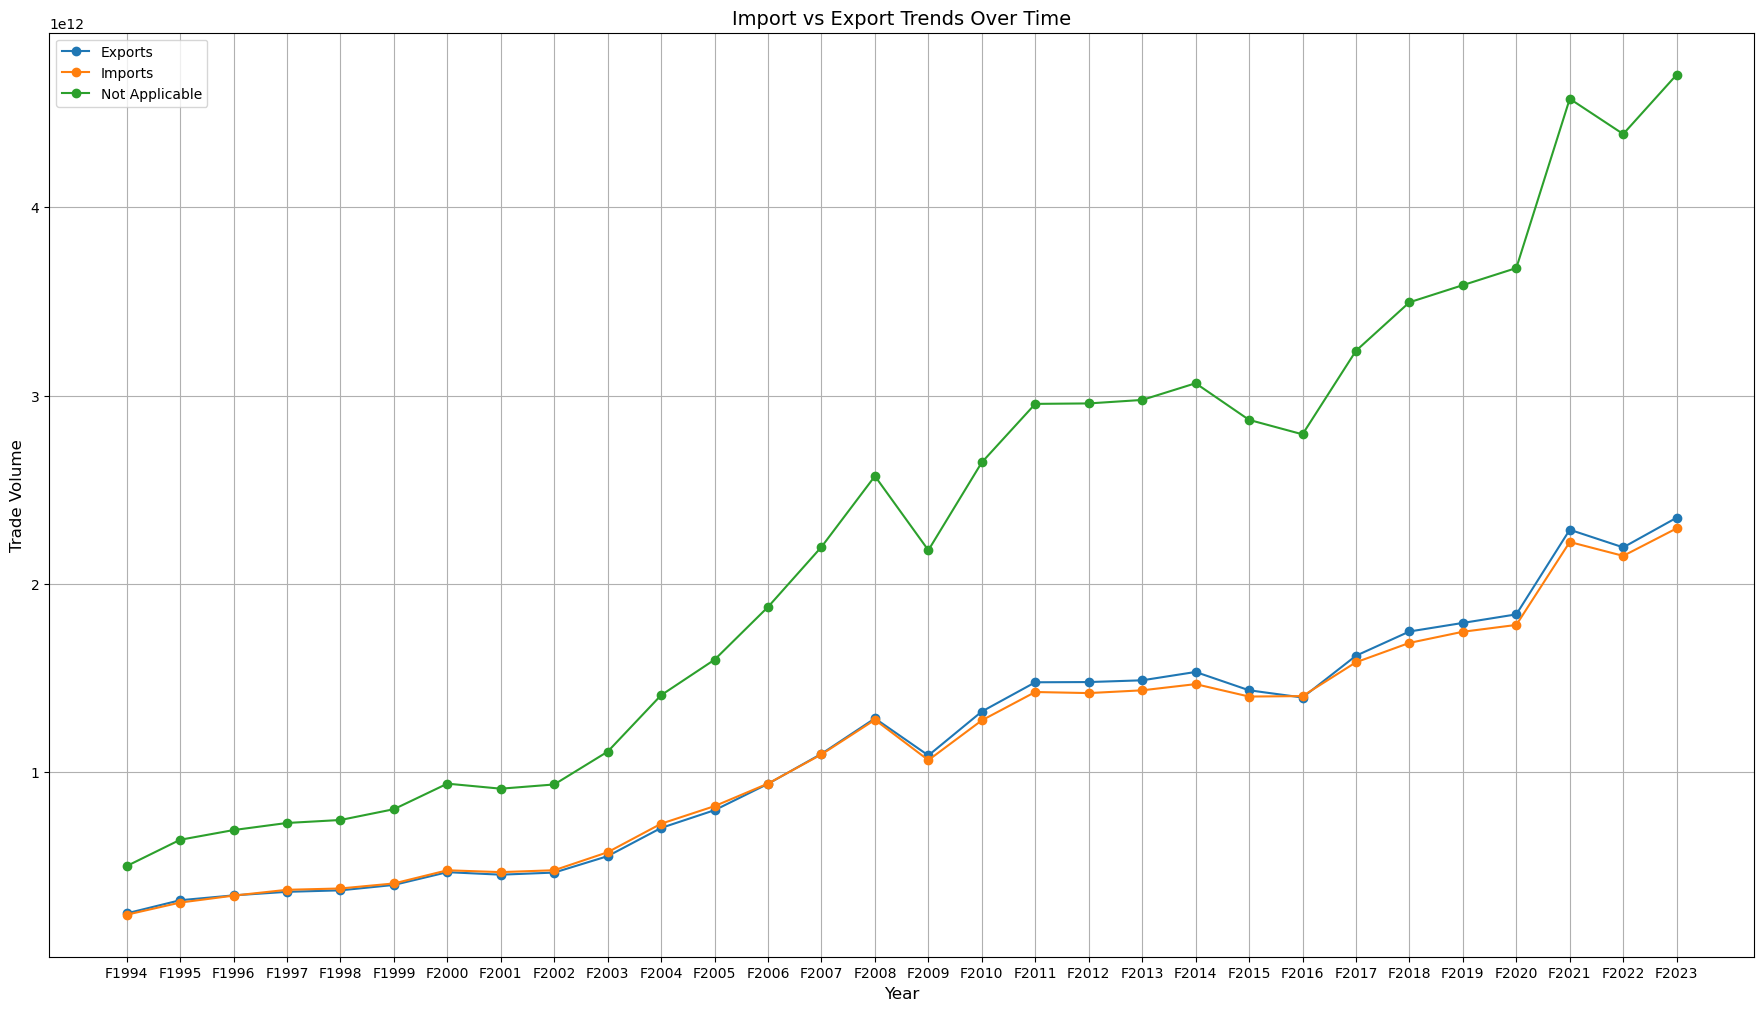

In [12]:
# 4. Import vs Export Trends
trade_flow_summary = df.groupby("Trade_Flow")[year_cols].sum().T

plt.figure(figsize=(22, 12))
for flow in trade_flow_summary.columns:
    plt.plot(trade_flow_summary.index, trade_flow_summary[flow], marker='o', label=flow)

plt.title("Import vs Export Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Trade Volume", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

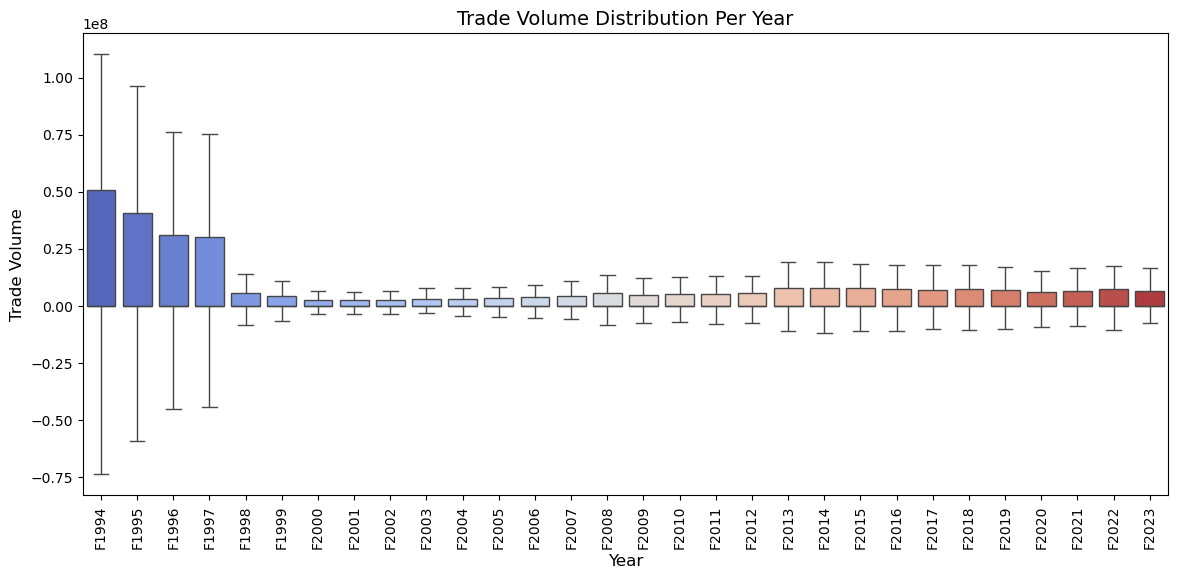

In [13]:
### 5. Box Plot: Distribution of Trade Volume Per Year ###
df_long = df.melt(id_vars=['Country'], value_vars=year_cols, var_name="Year", value_name="Trade Volume")

plt.figure(figsize=(14, 6))
sns.boxplot(x="Year", y="Trade Volume", data=df_long, showfliers=False, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Trade Volume Distribution Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Trade Volume", fontsize=12)
plt.show()

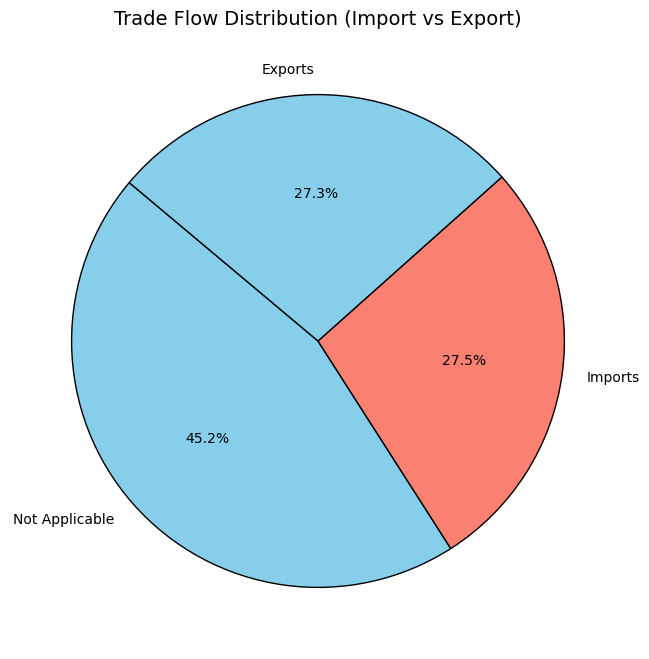

In [14]:
### 7. Pie Chart: Trade Flow Proportion ###
trade_flow_counts = df["Trade_Flow"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(trade_flow_counts, labels=trade_flow_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Trade Flow Distribution (Import vs Export)", fontsize=14)
plt.show()

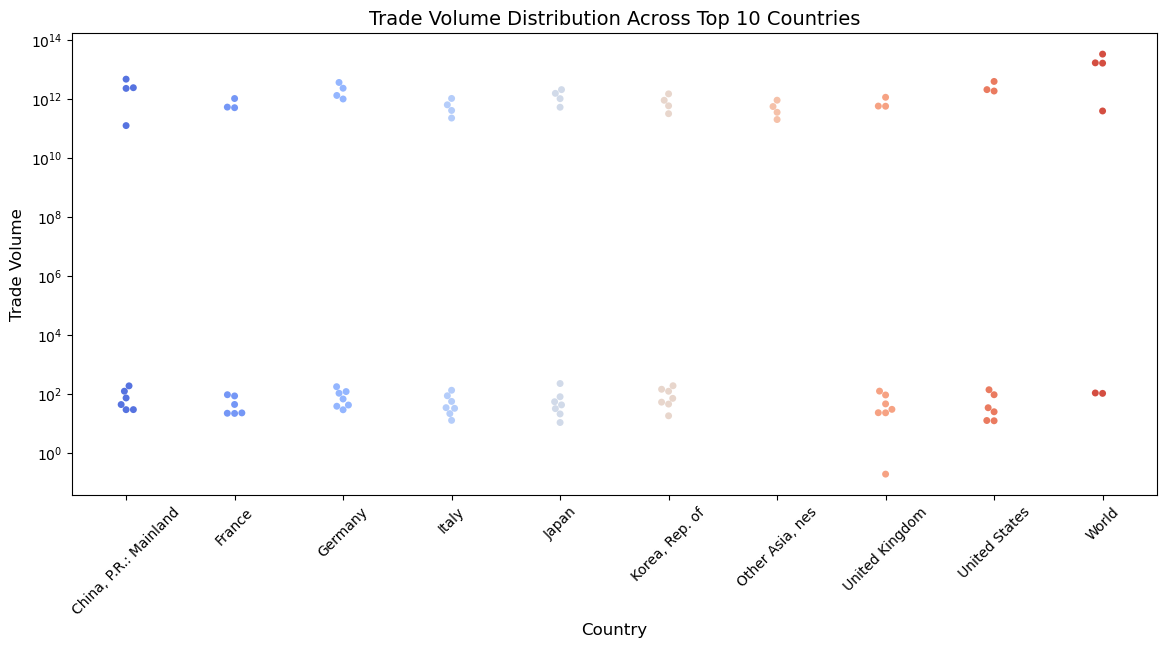

In [15]:
### 8. Swarm Plot: Country vs Trade Volume ###
top_countries_list = top_countries.index.tolist()
filtered_df = df[df['Country'].isin(top_countries_list)]

plt.figure(figsize=(14, 6))
sns.swarmplot(x="Country", y="Total_Trade", data=filtered_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Trade Volume Distribution Across Top 10 Countries", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Trade Volume", fontsize=12)
plt.yscale("log")
plt.show()

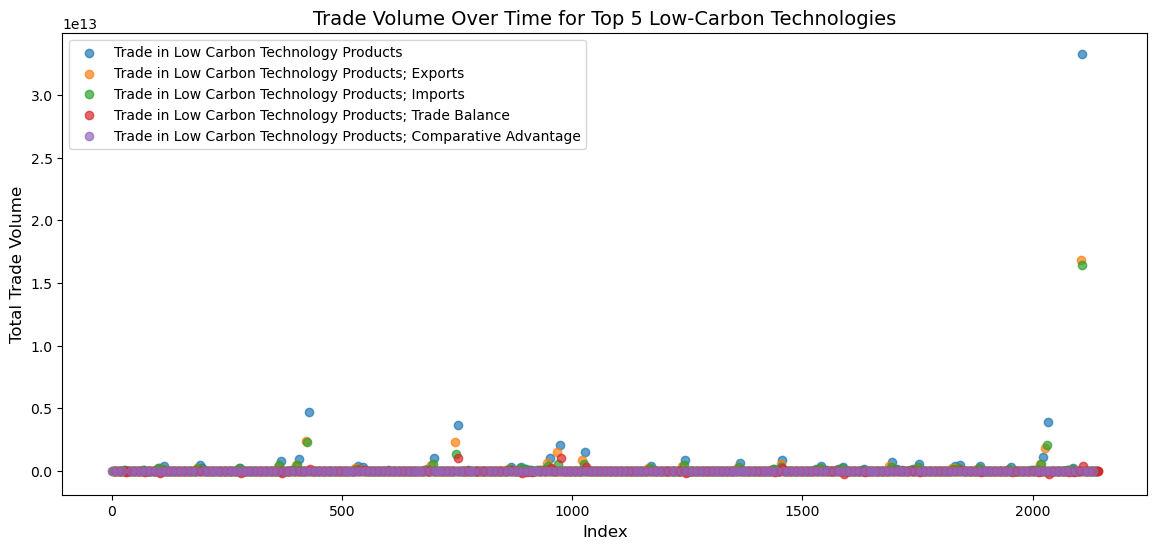

In [16]:

### 9. Scatter Plot: Trade Volume Over Time for Top Technologies ###
top_techs = df.groupby("CTS_Name")['Total_Trade'].sum().nlargest(5).index.tolist()
filtered_tech_df = df[df['CTS_Name'].isin(top_techs)]

plt.figure(figsize=(14, 6))
for tech in top_techs:
    tech_df = filtered_tech_df[filtered_tech_df["CTS_Name"] == tech]
    plt.scatter(tech_df.index, tech_df["Total_Trade"], label=tech, alpha=0.7)

plt.title("Trade Volume Over Time for Top 5 Low-Carbon Technologies", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Total Trade Volume", fontsize=12)
plt.legend()
plt.show()


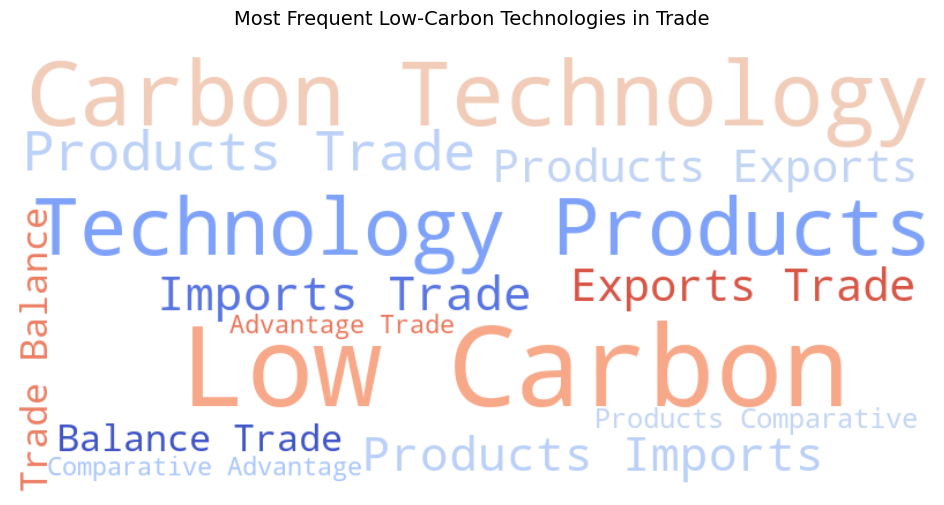

In [17]:
### 5. Word Cloud: Most Frequent Trade Technologies ###
text = " ".join(df["CTS_Name"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Low-Carbon Technologies in Trade", fontsize=14)
plt.show()

### <i> Data Preprocessing </i>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# 1. Handling Missing Values
# Use SimpleImputer to fill missing values for numerical columns with median or mode for categorical
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Fill numerical missing values with median
imputer = SimpleImputer(strategy="median")
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Fill categorical missing values with the most frequent value
imputer_cat = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# 2. Encoding Categorical Columns
# For categorical columns, we will use LabelEncoder for simplicity
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for possible inverse_transform later

# 3. Feature Selection: Drop irrelevant columns (like ObjectId, Source, etc.)
df = df.drop(columns=["ObjectId", "Source", "CTS_Full_Descriptor", "CTS_Code"])  # Customize as per dataset

# 4. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Trade_Flow"]))  # Scaling features excluding the target

# Add the scaled features back into the dataframe
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=["Trade_Flow"]).columns)

# 5. Handling Imbalanced Target Column (Balancing Trade_Flow)
# For balancing, we use SMOTE to oversample the minority class
X = df_scaled
y = df["Trade_Flow"]

# Checking class distribution
print("Before balancing:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After balancing:")
print(pd.Series(y_resampled).value_counts())

# 6. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")



Before balancing:
Trade_Flow
2    968
1    590
0    585
Name: count, dtype: int64
After balancing:
Trade_Flow
2    968
0    968
1    968
Name: count, dtype: int64
Training Features Shape: (2032, 38)
Testing Features Shape: (872, 38)
Training Labels Shape: (2032,)
Testing Labels Shape: (872,)


  File "C:\Users\aiahm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aiahm\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aiahm\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aiahm\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### <i> Modeling </i>
### <i> Logistic Regression </i>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Cross-validation (optional)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f}")


Logistic Regression Model Evaluation:
Accuracy: 0.8521
Confusion Matrix:
[[282   0   0]
 [  0 275  27]
 [ 50  52 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       282
           1       0.84      0.91      0.87       302
           2       0.87      0.65      0.74       288

    accuracy                           0.85       872
   macro avg       0.85      0.85      0.85       872
weighted avg       0.85      0.85      0.85       872

Cross-validated Accuracy: 0.7849


### <i> SVC </i>

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Support Vector Machine model
svm_clf = SVC(random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluation metrics
print("Support Vector Machine Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Model Evaluation:
Accuracy: 0.9954
Confusion Matrix:
[[281   0   1]
 [  0 299   3]
 [  0   0 288]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      0.99      1.00       302
           2       0.99      1.00      0.99       288

    accuracy                           1.00       872
   macro avg       1.00      1.00      1.00       872
weighted avg       1.00      1.00      1.00       872



### <i> KNN </i>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can tune the n_neighbors parameter

# Train the model
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluation metrics
print("K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Model Evaluation:
Accuracy: 0.9885
Confusion Matrix:
[[279   3   0]
 [  5 295   2]
 [  0   0 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       282
           1       0.99      0.98      0.98       302
           2       0.99      1.00      1.00       288

    accuracy                           0.99       872
   macro avg       0.99      0.99      0.99       872
weighted avg       0.99      0.99      0.99       872



### <i> Comparison Of All Models </i>

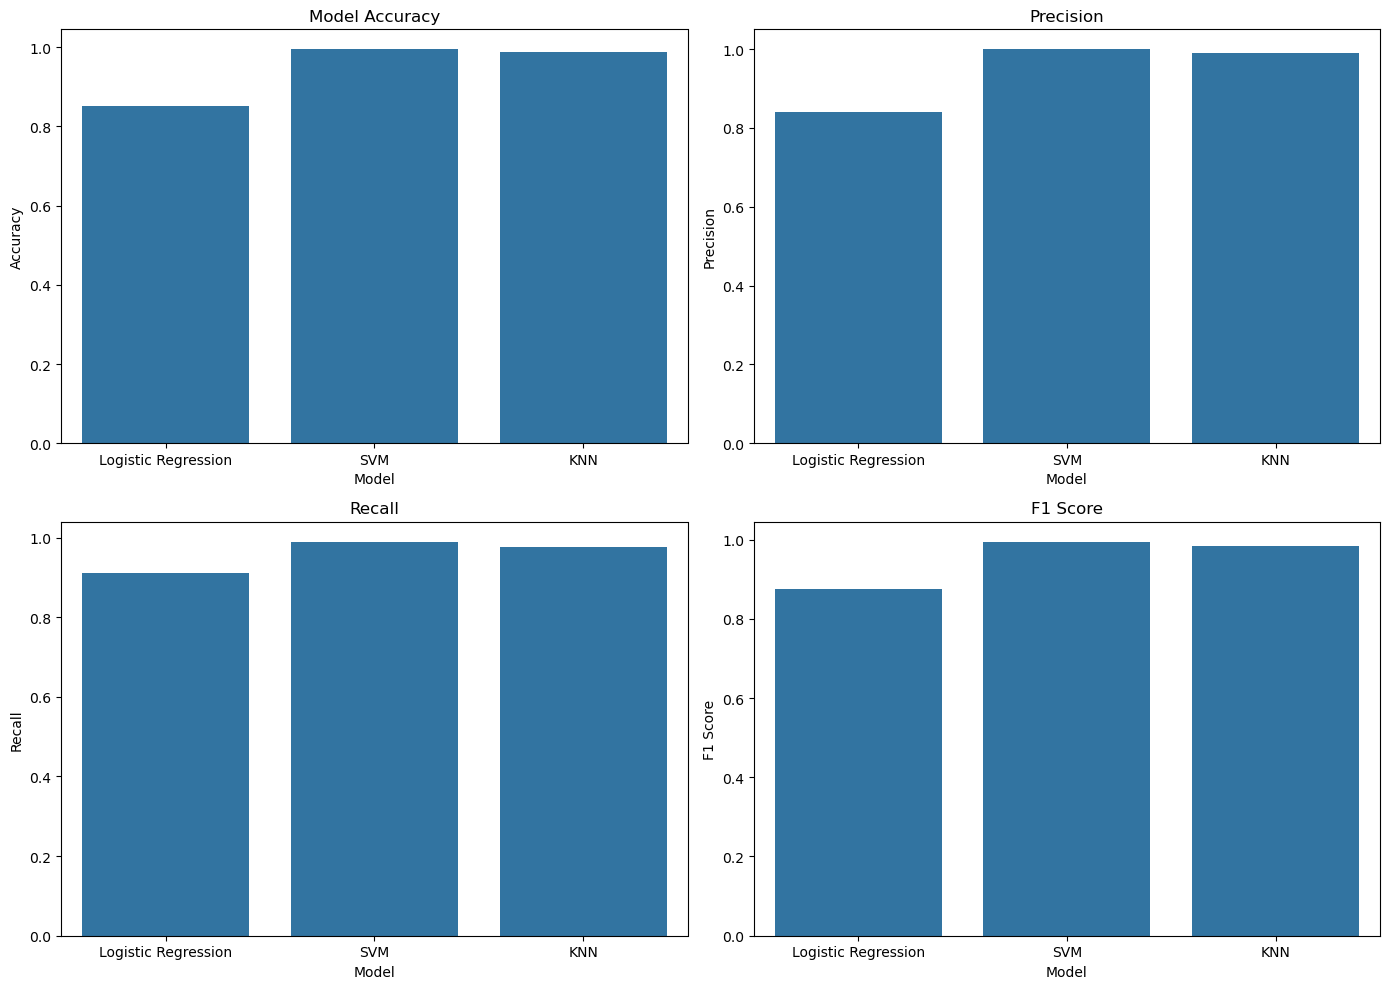

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the models
models = [log_reg, svm_clf, knn_clf]
model_names = ["Logistic Regression", "SVM", "KNN"]

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1-score for the positive class (class '1')
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])

# Create a DataFrame for easier visualization
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})

# Plot the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy plot
sns.barplot(x="Model", y="Accuracy", data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracy")

# Precision plot
sns.barplot(x="Model", y="Precision", data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title("Precision")

# Recall plot
sns.barplot(x="Model", y="Recall", data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title("Recall")

# F1 Score plot
sns.barplot(x="Model", y="F1 Score", data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title("F1 Score")

# Adjust layout
plt.tight_layout()
plt.show()
